In [1]:
from google.colab import files
uploaded = files.upload()


Saving online_retail.csv to online_retail (1).csv


# ✅ Step 1: Dataset Collection and Understanding

In [2]:

import pandas as pd

# 1. Load Dataset
df = pd.read_csv("online_retail.csv", encoding='ISO-8859-1')
print("✅ Dataset Loaded Successfully")

# 2. Basic Info
print("\n--- Dataset Shape ---")
print("Rows, Columns:", df.shape)

print("\n--- Column Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

# 3. Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\nMissing Value Percentage:")
print((df.isnull().sum() / len(df)) * 100)

# 4. Duplicates
print("\n--- Duplicate Records ---")
print("Total Duplicates:", df.duplicated().sum())

# Removing duplicates
df = df.drop_duplicates()

# 5. Unusual / Outlier Records
print("\n--- Invalid Quantity Records (<=0) ---")
print(df[df['Quantity'] <= 0])

print("\n--- Invalid Price Records (<=0) ---")
print(df[df['UnitPrice'] <= 0])

# 6. Summary Statistics
print("\n--- Summary Statistics ---")
print(df.describe())

# 7. Initial Insights
print("\nUnique Customers:", df['CustomerID'].nunique())
print("Unique Products:", df['StockCode'].nunique())
print("\n--- Transactions per Country ---")
print(df['Country'].value_counts().head(10))  # Top 10 countries

✅ Dataset Loaded Successfully

--- Dataset Shape ---
Rows, Columns: (541909, 8)

--- Column Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

--- First 5 Rows ---
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT H

# ✅ Step 2: Data Preprocessing

In [3]:

# 1. Remove rows with missing CustomerID
print("Before removing missing CustomerID:", df.shape)
df = df.dropna(subset=['CustomerID'])
print("After removing missing CustomerID:", df.shape)


# 2. Exclude cancelled invoices (InvoiceNo starting with 'C')
print("Before removing cancelled invoices:", df.shape)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print("After removing cancelled invoices:", df.shape)


# 3. Remove negative or zero quantities and prices
print("Before removing invalid Quantity/Price:", df.shape)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print("After removing invalid Quantity/Price:", df.shape)


# ✅ Final Check
print("\n--- Cleaned Dataset Info ---")
print(df.info())
print("Unique Customers:", df['CustomerID'].nunique())
print("Unique Products:", df['StockCode'].nunique())

Before removing missing CustomerID: (536641, 8)
After removing missing CustomerID: (401604, 8)
Before removing cancelled invoices: (401604, 8)
After removing cancelled invoices: (392732, 8)
Before removing invalid Quantity/Price: (392732, 8)
After removing invalid Quantity/Price: (392692, 8)

--- Cleaned Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB
None
Unique Customers: 4338
Unique Products: 3665


## ✅ Step 3 : Exploratory Data Analysis (EDA)

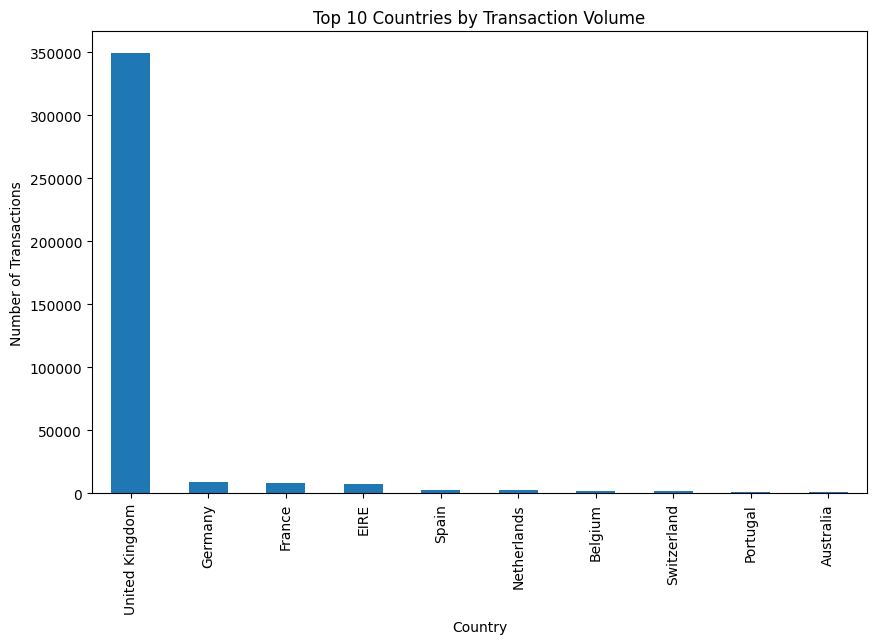

In [4]:
#1. Analyze Transaction Volume by Country

import matplotlib.pyplot as plt

# Top 10 countries by number of transactions
country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
country_counts.plot(kind='bar')
plt.title("Top 10 Countries by Transaction Volume")
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.show()


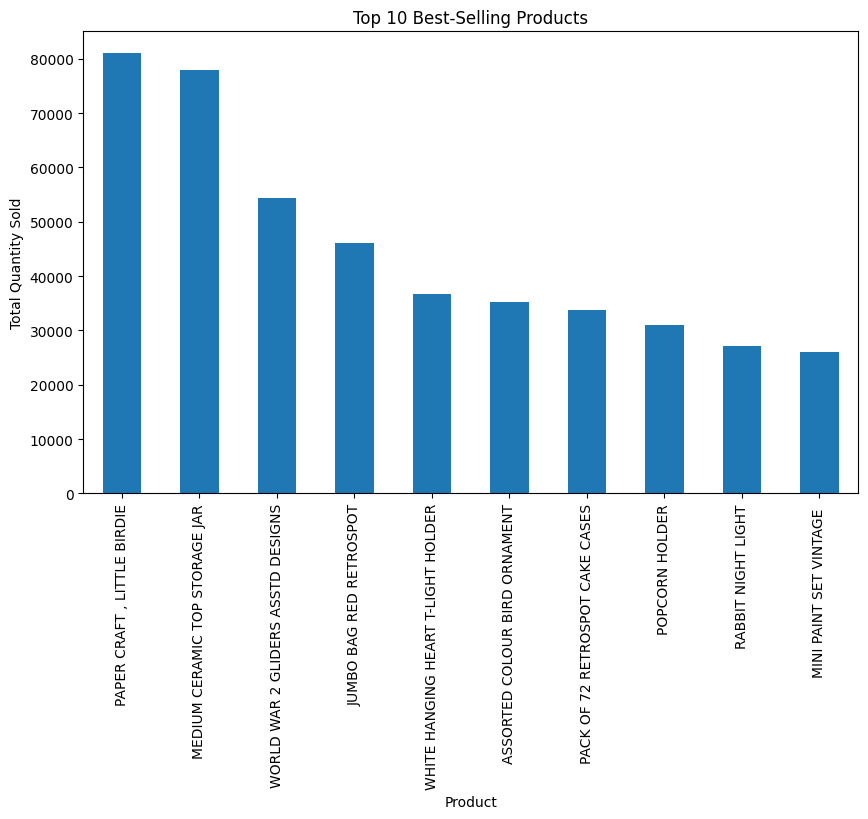

In [5]:
#2. Identify Top-Selling Products

# Total quantity sold per product
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.show()


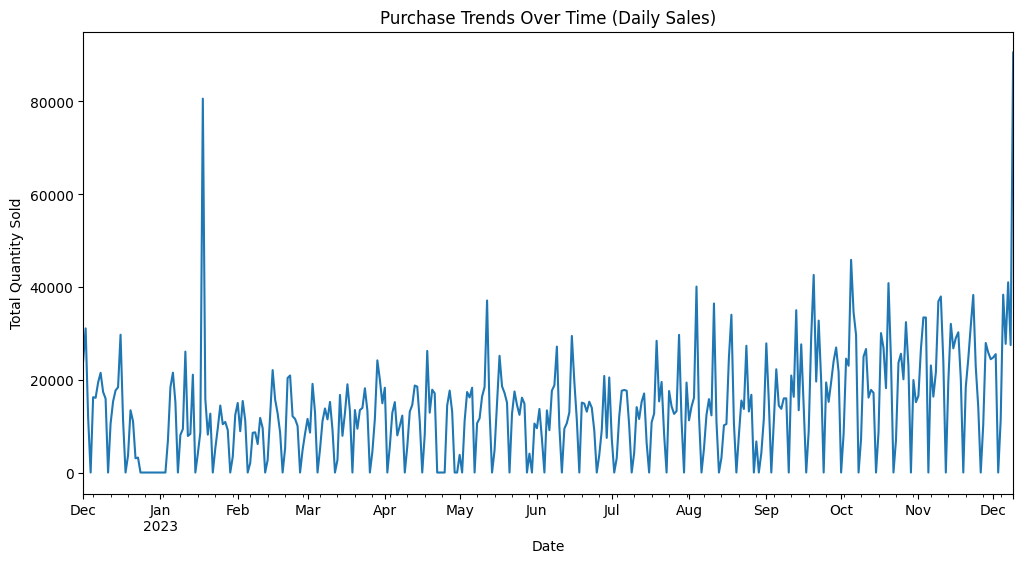

In [6]:
#3. Visualize Purchase Trends Over Time

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Daily transaction counts
daily_sales = df.set_index('InvoiceDate').resample('D')['Quantity'].sum()

plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title("Purchase Trends Over Time (Daily Sales)")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.show()


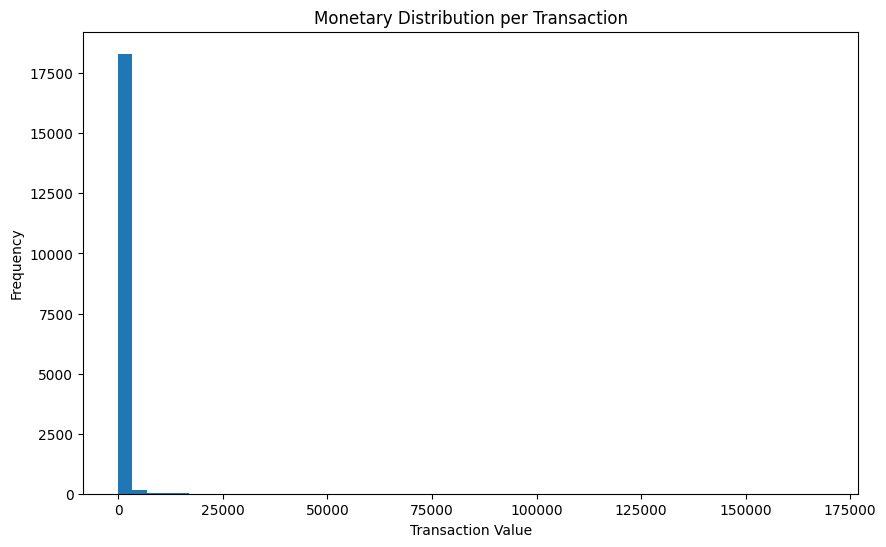

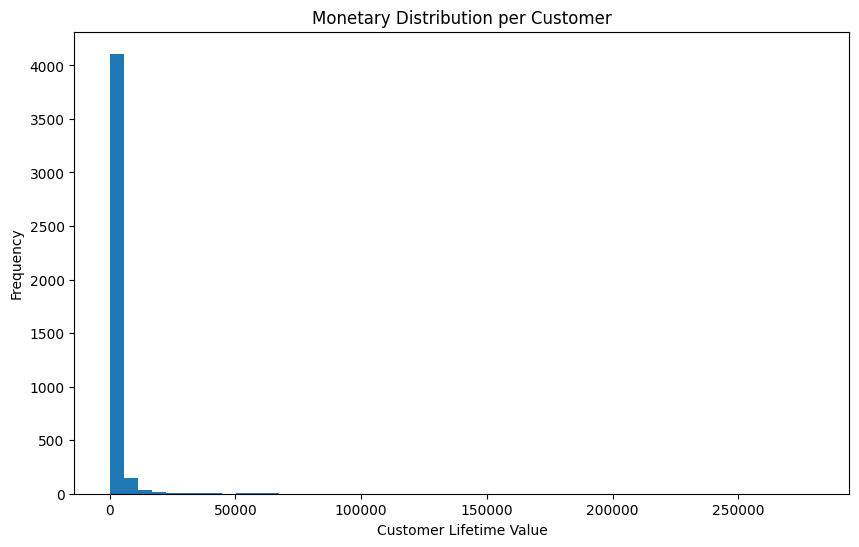

In [7]:
#4. Inspect Monetary Distribution per Transaction & Customer

# Total price = Quantity * UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Transaction monetary value
transaction_value = df.groupby('InvoiceNo')['TotalPrice'].sum()

plt.figure(figsize=(10,6))
plt.hist(transaction_value, bins=50)
plt.title("Monetary Distribution per Transaction")
plt.xlabel("Transaction Value")
plt.ylabel("Frequency")
plt.show()

# Per customer spending
customer_value = df.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(10,6))
plt.hist(customer_value, bins=50)
plt.title("Monetary Distribution per Customer")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Frequency")
plt.show()


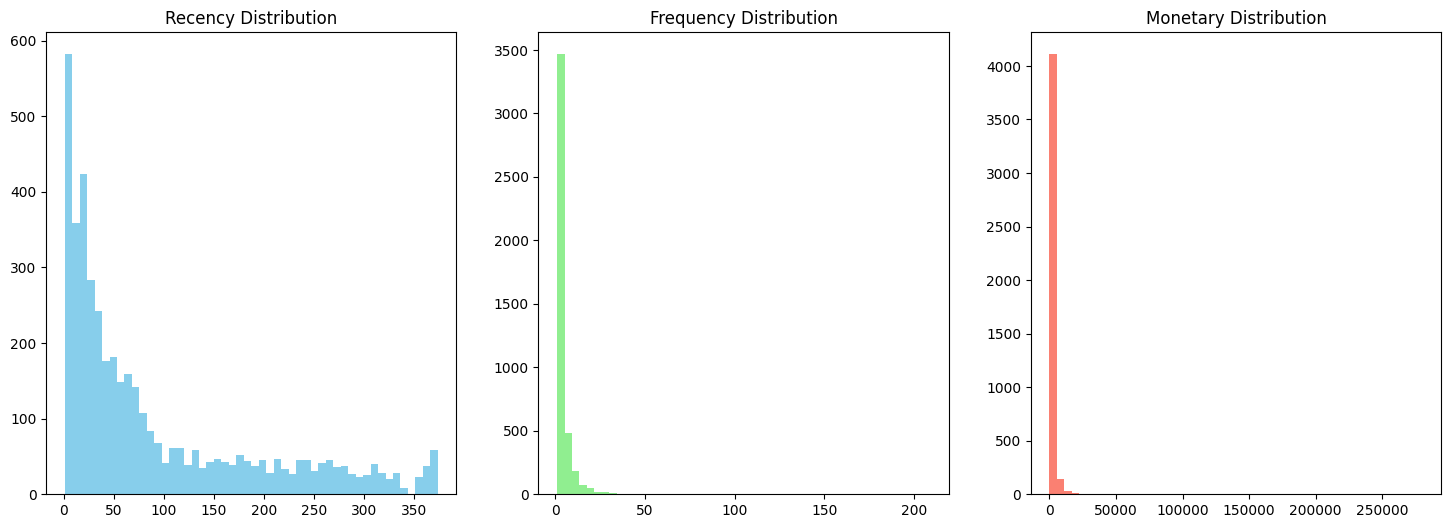

In [8]:
#5. RFM Distributions (Recency, Frequency, Monetary)

import datetime as dt

# Reference date = max date + 1
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# RFM calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'      # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18,6))
axes[0].hist(rfm['Recency'], bins=50, color='skyblue')
axes[0].set_title("Recency Distribution")
axes[1].hist(rfm['Frequency'], bins=50, color='lightgreen')
axes[1].set_title("Frequency Distribution")
axes[2].hist(rfm['Monetary'], bins=50, color='salmon')
axes[2].set_title("Monetary Distribution")
plt.show()


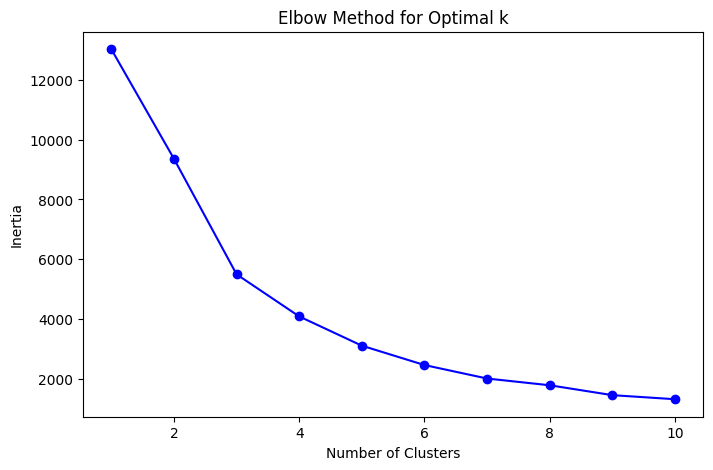

In [9]:
#6. Elbow Curve for Cluster Selection

from sklearn.cluster import KMeans
import numpy as np

X = rfm[['Recency','Frequency','Monetary']]

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


            Recency  Frequency       Monetary
Cluster                                      
0         43.702685   3.682711    1353.625312
1        248.075914   1.552015     478.848773
2          7.384615  82.538462  127187.959231
3         15.500000  22.333333   12690.500392


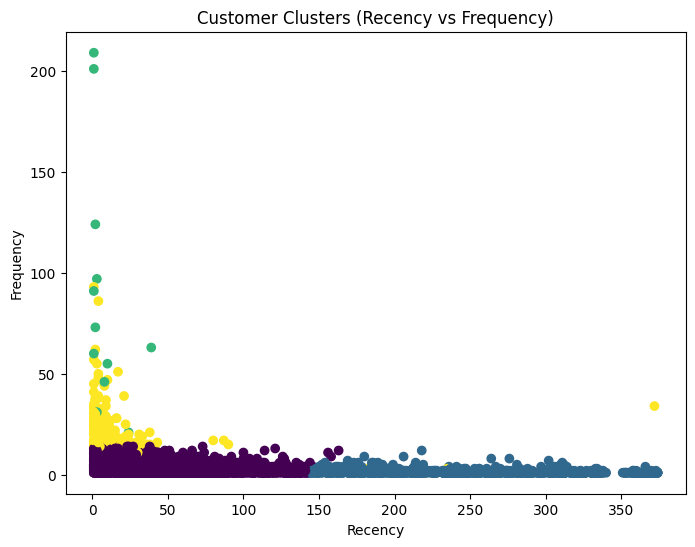

In [10]:
#7. Customer Cluster Profiles

# Apply KMeans with chosen k (example k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster Profiles
cluster_profiles = rfm.groupby('Cluster').mean()
print(cluster_profiles)

# Visualize clusters (Recency vs Frequency)
plt.figure(figsize=(8,6))
plt.scatter(rfm['Recency'], rfm['Frequency'], c=rfm['Cluster'], cmap='viridis')
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("Customer Clusters (Recency vs Frequency)")
plt.show()


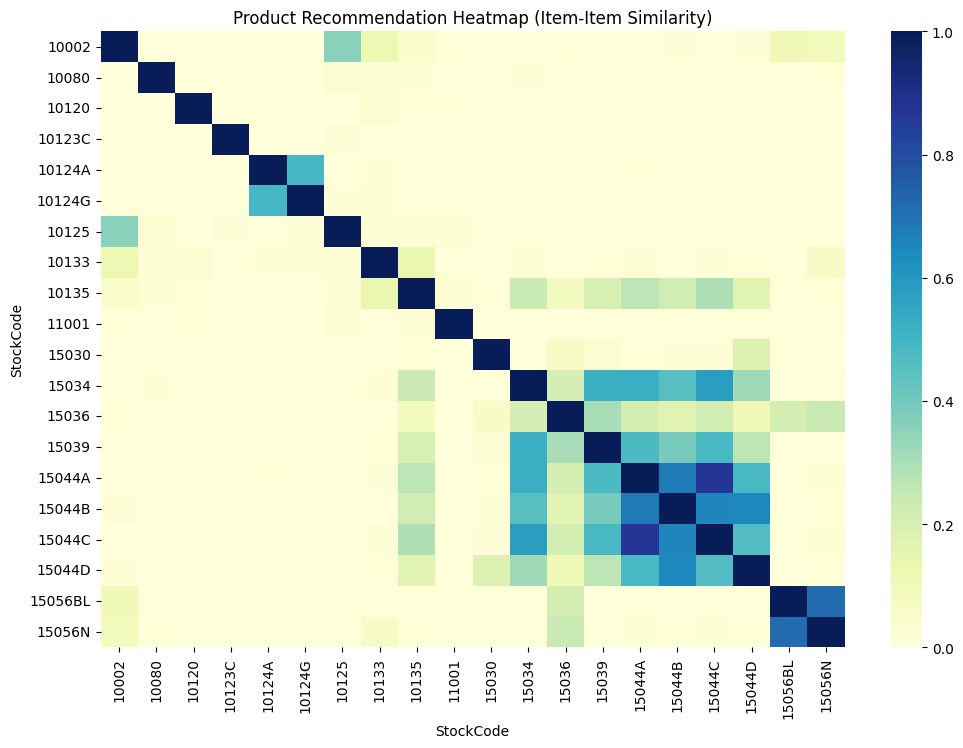

In [11]:
#8. Product Recommendation Heatmap / Similarity Matrix

# User-Item Matrix
user_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Similarity Matrix (Cosine Similarity)
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

similarity = cosine_similarity(user_item_matrix.T)  # item-item similarity
similarity_df = pd.DataFrame(similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# Heatmap for first 20 products
plt.figure(figsize=(12,8))
sns.heatmap(similarity_df.iloc[:20, :20], cmap="YlGnBu")
plt.title("Product Recommendation Heatmap (Item-Item Similarity)")
plt.show()


# ✅Step 4: Clustering Methodology (RFM + KMeans + Cluster Labelling)

In [12]:
#Importing libraries
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [13]:
# -----------------------------
# 1️⃣ Feature Engineering – RFM
# -----------------------------
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print("✅ RFM Table Head:\n", rfm.head())


✅ RFM Table Head:
    CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


In [14]:
# -------------------------------
# 2️⃣ Standardize / Normalize RFM
# -------------------------------

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])


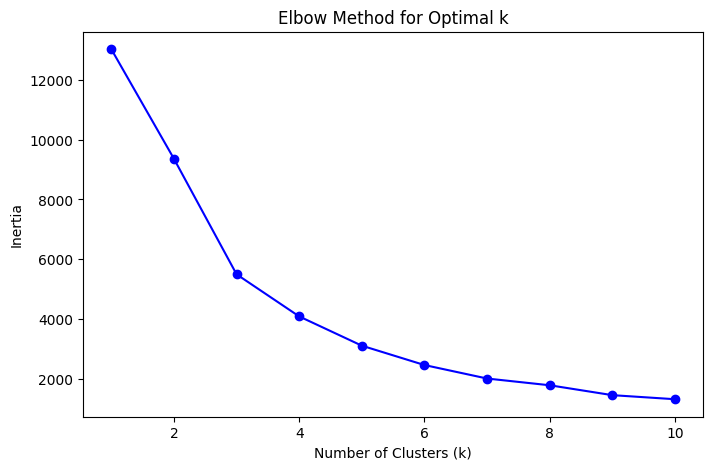

In [15]:
# -----------------------------
# 3️⃣ Choose Clustering Algorithm
#       +
# 4️⃣ Elbow Method
# -----------------------------

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [16]:
# ------------------
# 5️⃣ Run Clustering
# ------------------

# Suppose optimal k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [17]:
# -----------------------------
# 6️⃣ Label the clusters
# -----------------------------

# Compute cluster averages
cluster_profiles = rfm.groupby('Cluster').mean().round(1)
print("✅ Cluster Profiles:\n", cluster_profiles)

# Map cluster numbers to segment labels (based on RFM interpretation)
cluster_labels = {
    0: 'Regular',
    1: 'High-Value',
    2: 'Occasional',
    3: 'At-Risk'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)
print("✅ RFM with Segment Labels:\n", rfm.head())

✅ Cluster Profiles:
          CustomerID  Recency  Frequency  Monetary
Cluster                                          
0           15289.1     43.7        3.7    1353.6
1           15347.8    248.1        1.6     478.8
2           15435.0      7.4       82.5  127188.0
3           15212.9     15.5       22.3   12690.5
✅ RFM with Segment Labels:
    CustomerID  Recency  Frequency  Monetary  Cluster     Segment
0     12346.0      326          1  77183.60        3     At-Risk
1     12347.0        2          7   4310.00        0     Regular
2     12348.0       75          4   1797.24        0     Regular
3     12349.0       19          1   1757.55        0     Regular
4     12350.0      310          1    334.40        1  High-Value


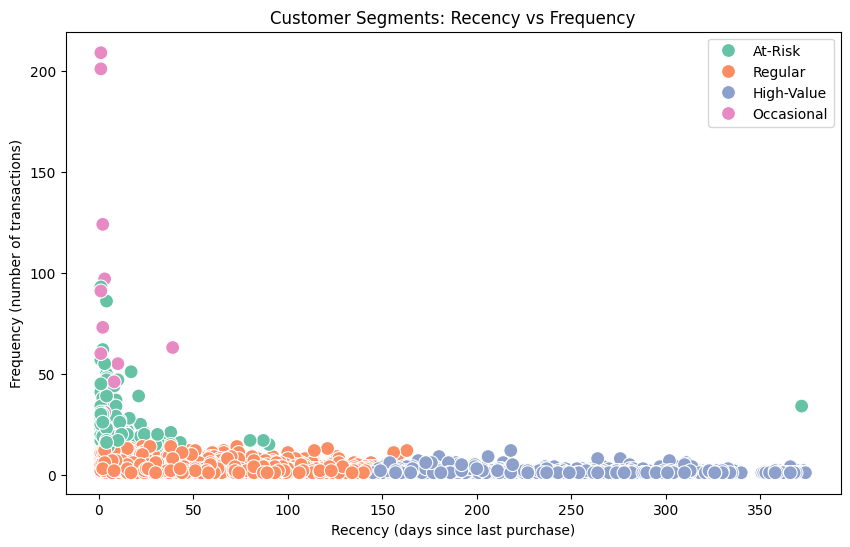

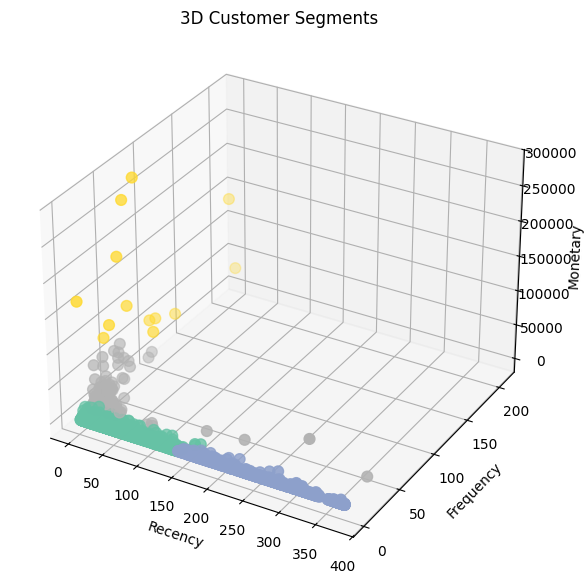

In [18]:
# -----------------------
# 7️⃣ Visualize Clusters
# -----------------------

# 2D Scatter (Recency vs Frequency)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=rfm, palette='Set2', s=100)
plt.title("Customer Segments: Recency vs Frequency")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Frequency (number of transactions)")
plt.legend()
plt.show()

# 3D Scatter (Recency, Frequency, Monetary)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
                     c=rfm['Cluster'], cmap='Set2', s=60)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Customer Segments')
plt.show()

In [19]:
# -----------------------------
# 8️⃣ Save Model for Deployment
# -----------------------------
joblib.dump(kmeans, "kmeans_rfm_model.pkl")
print("✅ KMeans model saved as 'kmeans_rfm_model.pkl'")

✅ KMeans model saved as 'kmeans_rfm_model.pkl'


In [24]:
# ------------------
# # System Approach
# ------------------

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# ================================
# 1. Load Dataset
# ================================
df = pd.read_csv("online_retail.csv", encoding="latin1")

In [25]:
# ================================
# 2. Preprocessing
# ================================
# Keep only valid CustomerID
df = df.dropna(subset=["CustomerID"])

# Remove cancelled invoices
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

# Remove negative or zero quantity/price
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# Convert to string for consistency
df["StockCode"] = df["StockCode"].astype(str)

In [26]:
# ================================
# 3. Customer-Item Matrix
# ================================
customer_item_matrix = (
    df.groupby(["CustomerID", "StockCode"])["Quantity"]
    .sum()
    .unstack(fill_value=0)
)


In [27]:
# ================================
# 4. Compute Item-Item Similarity
# ================================
similarity_matrix = cosine_similarity(customer_item_matrix.T)

# Convert to DataFrame with StockCodes
item_similarity_df = pd.DataFrame(
    similarity_matrix,
    index=customer_item_matrix.columns,
    columns=customer_item_matrix.columns
)

In [28]:
# ================================
# 5. Save CSV
# ================================
item_similarity_df.to_csv("item_similarity_matrix.csv")

print("✅ item_similarity_matrix.csv created and saved successfully!")

✅ item_similarity_matrix.csv created and saved successfully!


In [29]:
from google.colab import files

# Download each file
files.download("kmeans_rfm_model.pkl")
files.download("scaler.pkl")
files.download("item_similarity_matrix.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>